In [18]:
#IMPLEMENT THE KNN ( K NEAREST NEIGHBOUR) IRIS IMAGE CLASSIFICATION BASED ON A GIVEN SET OF TRAINING DATA SAMPLE. READ THE TRAINING DATA FROM THE CSV FILE.

In [33]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length','sepal_width','petal_length','petal_width','species']
iris = pd.read_csv(url,  header=None, names=col_names)

In [34]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [35]:
# allow plots to appear in the notebook

%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing

plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["font.size"] = 14

# create a custom colormap named cmap_bold using the ListedColormap class.
# It specifies three colors in hexadecimal format (#FF0000 for red, #00FF00 for green, and #0000FF for blue)

from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', "#00FF00", "#0000FF"])

In [36]:
# map each iris species to a number
# This dictionary maps each iris species ("Iris-setosa", "Iris-versicolor", "Iris-viginica")

iris["species_num"] = iris.species.map({"Iris-setosa":0, "Iris-versicolor": 1, "Iris-virginica": 2})

<Axes: xlabel='petal_length', ylabel='petal_width'>

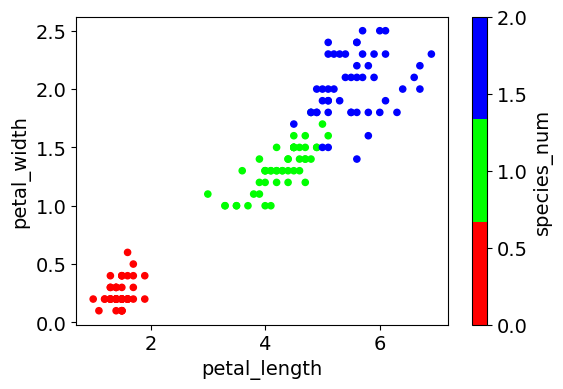

In [37]:
# create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
# The scatter plot allows visual exploration of the relationship between petal length and petal width funciton

iris.plot(kind = "scatter", x = "petal_length", y = "petal_width", c = "species_num", colormap = cmap_bold)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

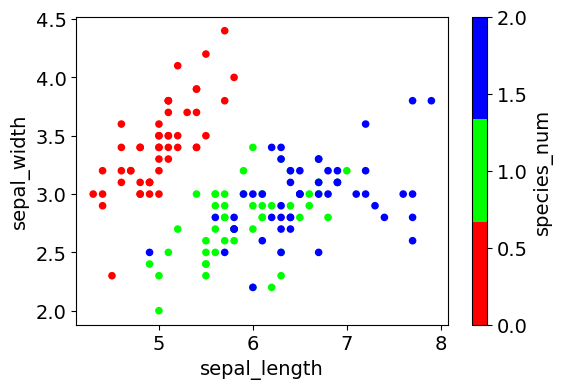

In [38]:
iris.plot(kind = "scatter", x = "sepal_length", y = "sepal_width", c = "species_num", colormap = cmap_bold)

In [39]:
iris.head()


sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   species_num  
0            0  
1            0  
2            0  
3            0  
4            0

In [40]:
# store feature matrix in "X"

feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# This line extracts the feature matrix from a dataset named iris and stores it in a variable called X.

X = iris[feature_cols]

# demonstrate different methods to create a feature matrix X from a dataset named iris


In [41]:
X = iris.drop(['species', 'species_num'], axis=1)

X = iris.loc[:, 'sepal_length':'petal_width']

X = iris.iloc[:, 0:4]

# store response vector in "y"

y = iris.species_num

# check X's type

print(type(X))

print(type(X.values))

# check y's type

print (type(y))

print (type(y.values))

# check X's shape (n = number of observations, p = number of features)

print (X.shape)

# check y's shape (single dimension with length n)

print (y.shape)

# This class is used for implementing the K-Nearest Neighbors (KNN) algorithm for classification tasks

from sklearn.neighbors import KNeighborsClassifier

# make an instance of a KNeighborsClassifier object

# Initializes the KNeighborsClassifier object with the parameter n_neighbors set to 1

# Meaning it will consider only the nearest neighbor when making predictions.



<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
(150, 4)
(150,)


In [42]:
knn = KNeighborsClassifier(n_neighbors=1)

type(knn)

print (knn)

knn.fit(X, y)

knn.predict([[3, 5, 4, 2]])

X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]

knn.predict(X_new)

# instantiate the model (using the value K=5)

knn = KNeighborsClassifier(n_neighbors=5)






KNeighborsClassifier(n_neighbors=1)


C:\Users\ACER\ancnda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ACER\ancnda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [43]:
knn.fit(X, y)



KNeighborsClassifier()

In [46]:
# predict the response for new observations

knn.predict(X_new)



C:\Users\ACER\ancnda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1], dtype=int64)

In [47]:
# calculate predicted probabilities of class membership

knn.predict_proba(X_new)

C:\Users\ACER\ancnda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0. , 0.8, 0.2],
       [0. , 1. , 0. ]])